In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


import scipy.stats as scs

## Let us start by looking at the Brownian Motion

In [2]:
I = 100000
T = 2.0
M = 2000
dt = T / M
W = np.zeros((M + 1, I))
Sq = np.zeros((M + 1, I))
W[0] = 0
Sq[0] = 0
for t in range(1, M + 1):
    W[t] = W[t - 1] + np.sqrt(dt) * npr.standard_normal(I)
    Sq[t] = Sq[t-1] + (W[t]-W[t-1])**2
    

Text(0, 0.5, 'index level')

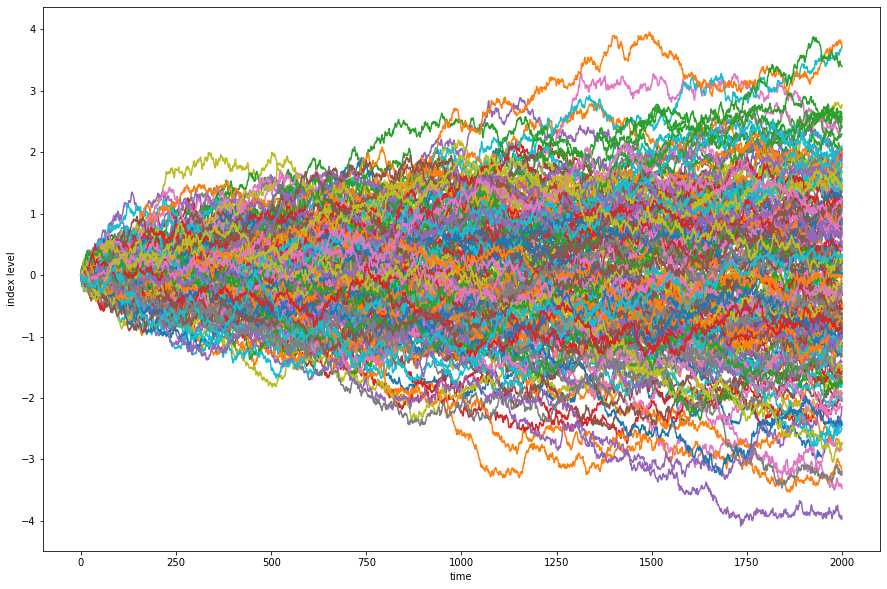

In [18]:
plt.plot(W[:, :200], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [4]:
sta = scs.describe(W[M])
sta

DescribeResult(nobs=100000, minmax=(-6.06200270854969, 6.2081790672939166), mean=-0.0016166112171063448, variance=2.0049653759571515, skewness=-0.008106859846884987, kurtosis=-0.016892635296739567)

### The standard deviation at time T = 2 should be:

In [5]:
np.sqrt(T)

1.4142135623730951

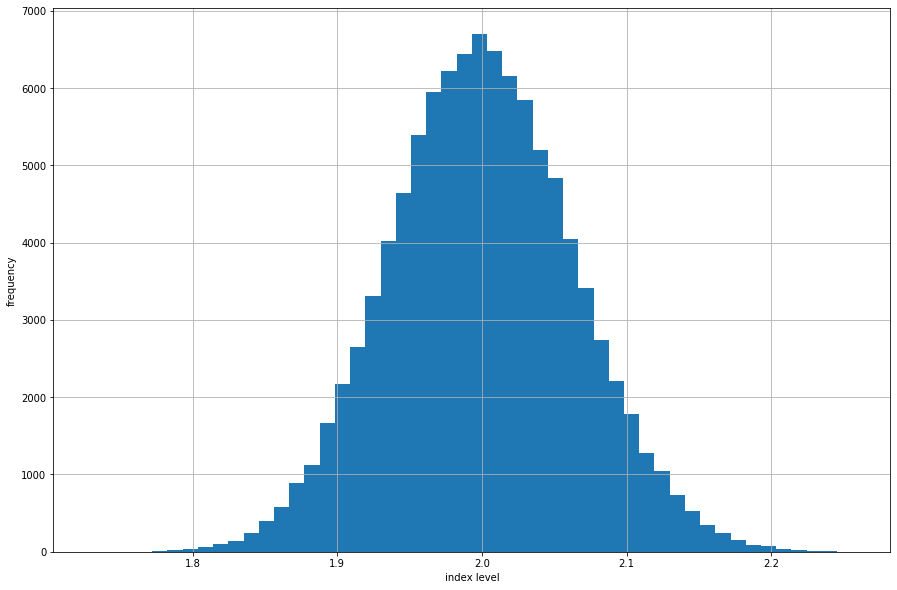

In [20]:
plt.hist(Sq[M], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

Text(0, 0.5, 'index level')

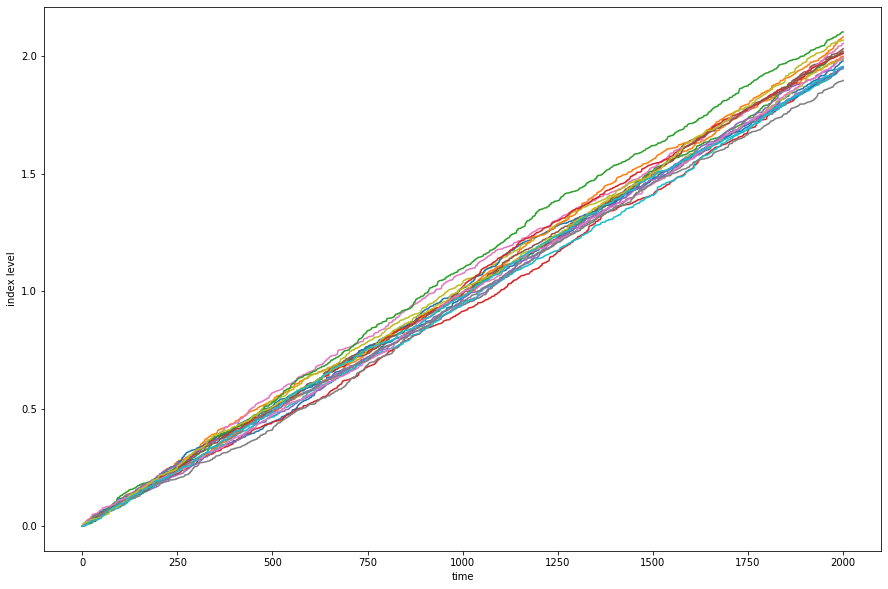

In [19]:
plt.plot(Sq[:, :20], lw=1.5)
#plt.plot(W[:, 1:2], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

## Now, let us look at how to model prices

In [25]:
S0 = 100  # initial value
r = 0.05  # constant short rate
sigma = 0.25  # constant volatility
T = 2.0  # in years
I = 100000  # number of random draws
S = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

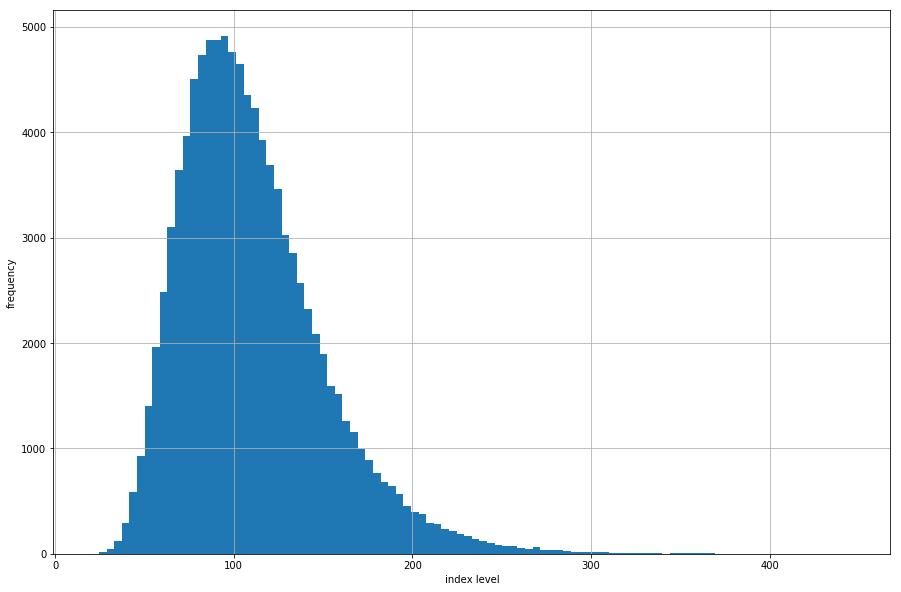

In [26]:
plt.hist(S, bins=100)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [27]:
sta1 = scs.describe(S)

In [28]:
print("%14s %14s" % ('statistic', ' '))
print(45 * "-")
print("%14s %14.3f " % ('size', sta1[0]))
print("%14s %14.3f " % ('min', sta1[1][0]))
print("%14s %14.3f " % ('max', sta1[1][1]))
print("%14s %14.3f " % ('mean', sta1[2]))
print("%14s %14.3f " % ('std', np.sqrt(sta1[3])))
print("%14s %14.3f " % ('skew', sta1[4]))
print("%14s %14.3f " % ('kurtosis', sta1[5]))

     statistic               
---------------------------------------------
          size     100000.000 
           min         20.283 
           max        446.248 
          mean        110.414 
           std         40.282 
          skew          1.144 
      kurtosis          2.403 


### The mean should be:

In [29]:
S0*np.exp(r*T)

110.51709180756477

### And the standard deviation:

In [30]:
np.sqrt(S0**2*np.exp(2*T*r)*(np.exp(sigma**2*T)-1))

40.327148153642305

In [31]:
I = 100000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))

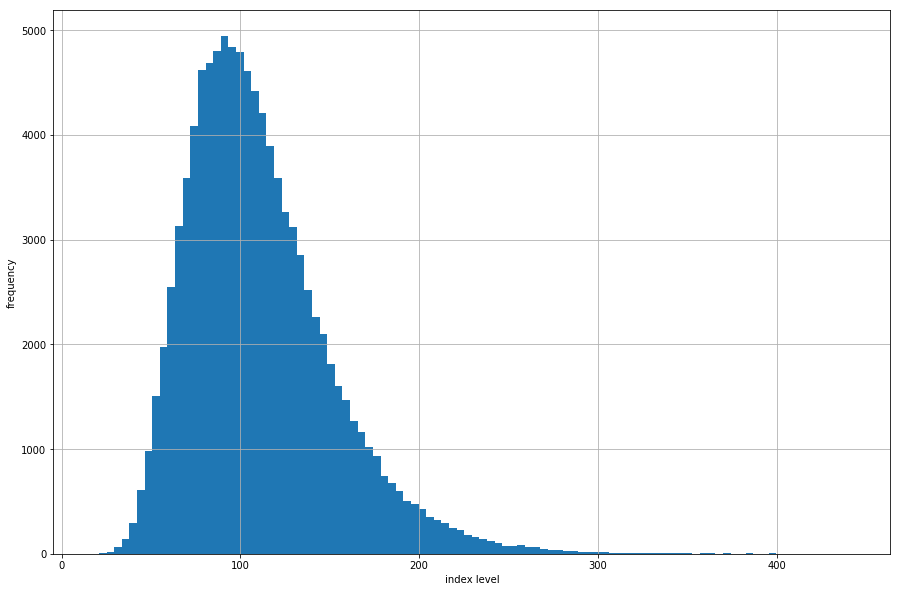

In [32]:
plt.hist(S[-1], bins=100)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

Text(0, 0.5, 'index level')

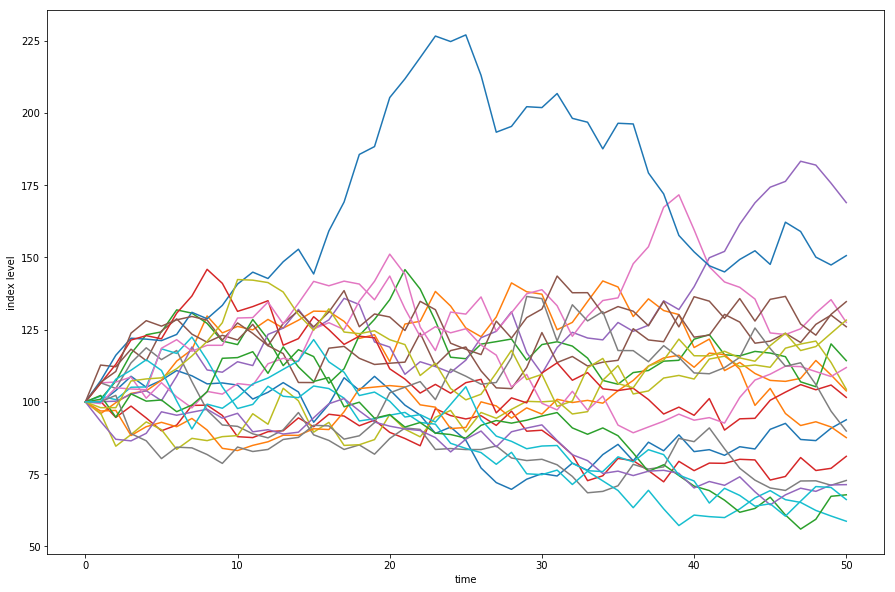

In [33]:
plt.plot(S[:, :20], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [34]:
S[0]

array([100., 100., 100., ..., 100., 100., 100.])